**Trabajo Final**

Sharon Nicole Barbosa Silva

In [91]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import math
import seaborn as sbn
# Scikit Learn
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
import warnings
warnings.simplefilter("ignore")

!pip install yfinance 
import yfinance as yf
from sklearn import datasets
from scipy.spatial import distance
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, normalize
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

from matplotlib.patches import Ellipse, Polygon
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.preprocessing import Normalizer
import matplotlib.patches as patches
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import *
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from matplotlib import gridspec 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV 
#cmap = ListedColormap(["Red","Green","Blue"])
%matplotlib inline

     |████████████████████████████████| 6.4 MB 11.9 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


La base de datos utilizada es una sobre el cancer y las características que tienen los tumores malignos y beningos en distintos pacientes, esta base de datos tiene una muestra de 568 y se busca saber el tipo de relación que tienen las características de estos tumores y verificar si estas inciden en la naturaleza del mismo. 

In [49]:
df = pd.read_csv('cancer.csv')
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [50]:
X.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


**CLUSTERS**

In [51]:
transformer = Normalizer().fit(X) 
transformer=transformer.transform(X)

In [52]:
def plot_elbow(kmeans_dict, elbow=None, w=11, h=5):
    plt.figure(figsize = (w,h))
    if elbow is not None:
        plt.axvline(x=elbow, linestyle='-.', c="black")
    plt.plot([k for k in kmeans_dict.keys()], [km.inertia_ for km in kmeans_dict.values()], '-o');
    ax = plt.gca()
    ax.tick_params('both', labelsize=(w+h)/2)
    ax.set_xlabel('K', fontsize=w)
    ax.set_ylabel("Inertia", fontsize=w)
    plt.show()

In [53]:
kmeans_sweep = {k : KMeans(n_clusters = k, random_state=1).fit(transformer) for k in range(1,10)}

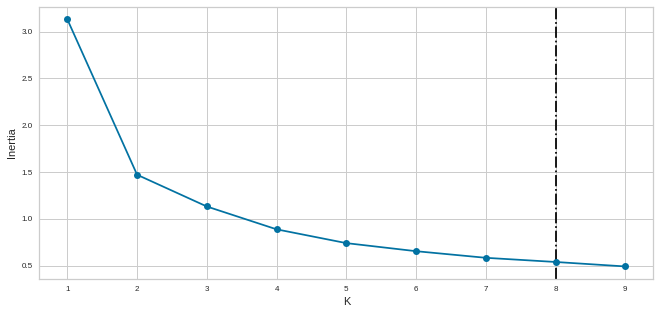

In [54]:
plot_elbow(kmeans_sweep, elbow=8)

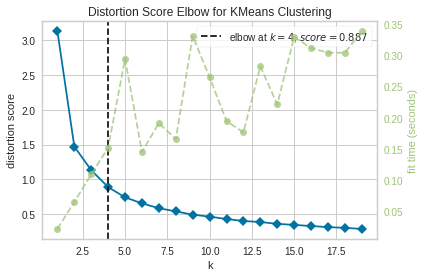

In [55]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, colors="yellowbrick",k=(1,20))
visualizer.fit(transformer)  # Fit the data to the visualizer
visualizer.show()

Basados en el método de Elbow, el k que debe usarse es 4, ya que la distancia de los cuadrados es pequeña entre las variables.

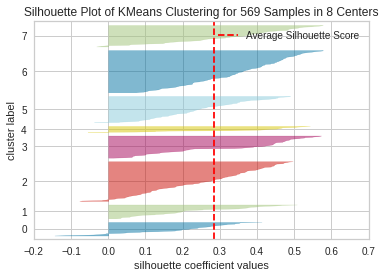

In [56]:
model = KMeans(8, random_state=42)
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")
visualizer.fit(transformer)  # Fit the data to the visualizer
visualizer.show()

In [57]:
pipeline = make_pipeline(Normalizer(), KMeans(n_clusters=8,random_state=1))
pipeline.fit(X)


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(random_state=1))])

In [58]:
labels = pipeline.predict(X)

In [59]:
pca = PCA(n_components=2) 
pca.fit(transformer)
data_info= pd.DataFrame(pca.transform(transformer), columns=['$Z_1$', '$Z_2$'])

Text(0, 0.5, '$Z_2$')

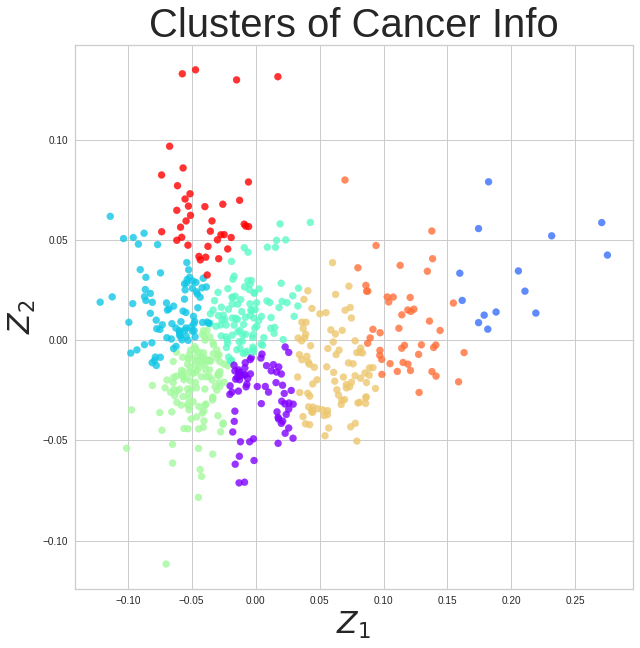

In [60]:
import matplotlib.cm as cm
clusters = labels
### plot the clusters
### fig size 20 20
fig = plt.figure(figsize=(10,10))
plt.scatter(data_info['$Z_1$'], data_info['$Z_2$'], c=clusters, cmap=cm.get_cmap('rainbow', 8), alpha=0.8)
### tittle with size 10
plt.title('Clusters of Cancer Info', size=40)
### axis labels with size 30
plt.xlabel('$Z_1$', size=30)
plt.ylabel('$Z_2$', size=30)


El gráfico de dispersión nos indica que esta base da datos alcanca a tener 8 tipos de clusters cuya distancia entre valores es pequeña.

In [65]:
X_std = (X - X.mean())/X.std()
X_std

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


In [68]:
from sklearn.neighbors import DistanceMetric
distm= DistanceMetric.get_metric('euclidean')
dm=distm.pairwise(X_std)

Text(0.5, 1.0, 'Cancer')

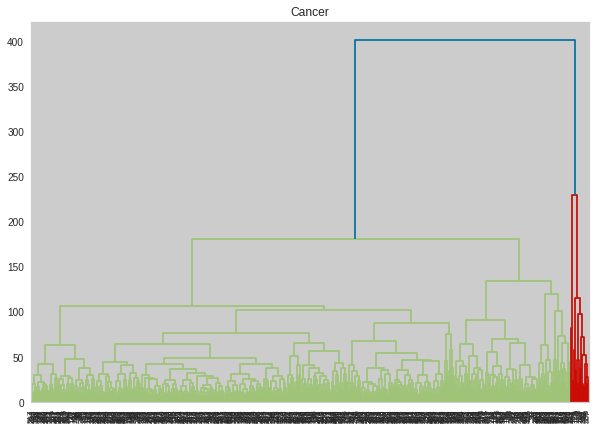

In [70]:
complete_linkage = linkage(dm, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(complete_linkage, labels=X.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Cancer")

Basados en el dendograma, se obtienen únicamente dos clusters, cuyo corte está por debajo de 250, lo que puede hacer refencia a que las características de los tumores si están relacionadas de acuerdo al tipo de tumor que la persona tenga, ya sea maligno o benigno.

El análisis de clusters de esta base de datos permite verificar la agrupación que se les da a los datos para analizarlos respectivamente. Lo que permitió ver que entre menor era su distancia de datos, más grande era su grupo de datos. 

**SIMULACIÓN MONTE CARLO**

La simulación de Monte Carlo necesita contar con una base de datos que pueda ser visualizada a través del tiempo con la cual se cuente con un punto de partida, teniendo en cuenta que la base de datos de cancer no tiene una serie de tiempo, no es posible continuar el análisis de la misma. En ese sentido, se decidió usar una base de datos diferentes en la que se pueda responder si el valor de la acción de Tesla logrará superar el precio de 1100 USD. Para esto, se toma la base de datos desde Enero del 2010 hasta Diciembre del 2021. 

[*********************100%***********************]  1 of 1 completed


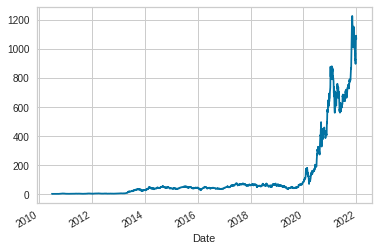

In [92]:
tsla = yf.download("TSLA", start="2010-01-01",end="2021-12-31")
tsla = tsla.loc[:,"Close"]
tsla.plot()

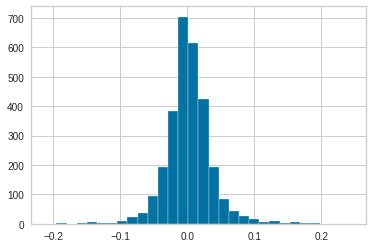

In [93]:
rtsla = tsla.pct_change().dropna()
rtsla.hist(bins=30)

In [94]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S # {"S":S} 
    return St

In [96]:
T = 1
mu1 = np.mean(rtsla)
sigma1 = np.std(rtsla)
S0 = 1056.78
NS = 10000
M = 252
St = PathsGBM(S0,mu1,sigma1,T,NS,M)
#St
#St = St["S"]

Teniendo en cuenta que el valor de las acciones de Tesla para Diciembre 31, 2021 fue de 1056.78, partimos desde el para realizar las simulaciones. En este caso, se ha decidido realizar 10000 simulaciones para verificar el comportamiento de la acción.

Text(0, 0.5, 'S(t)')

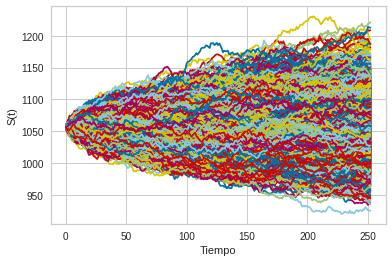

In [97]:
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")
plt.ylabel("S(t)")

In [98]:
St[:,252].mean()  

1059.3518842297904

In [99]:
S0 * np.exp(mu1 * T) 

1059.4165070221884

Teniendo en cuenta los resultados obtenidos, se puede decir que el modelo se está distribuyendo de manera normal dado que los resultados de los valores esperados son similares. Según la simulación, el precio de la acción promedio será de 1059.35.

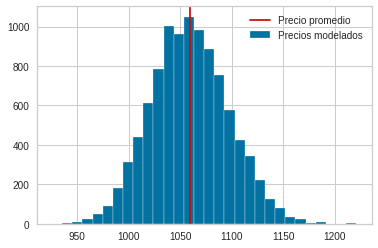

In [100]:
plt.hist(St[:,-1], bins=30, label='Precios modelados')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio')
plt.legend()

#Verificación de que se distribuye normal

En este caso, me gustaría saber si la acción lograría subir el valor de 1100 USD.

In [101]:
K= 1100
Stsup = St[:,252] > K
Stsup = pd.DataFrame(Stsup)
Stsup.value_counts()

False    8569
True     1431
dtype: int64

A lo que basados en el modelo realizado, la acción tiene una probabilidad de 14,31% de superar el valor de 1100 USD.